<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/Relat%C3%B3rio_de_an%C3%A1lise_metragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório de análise metragem**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (11,7)
parametros = {'axes.labelsize': 20, 'axes.titlesize': 25}
plt.rcParams.update(parametros)



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Estudos_database_imoveis_SP/Arquivos_outliers_removidos/database_outliers_metragem_removidos.csv')

In [3]:
data.head()

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.0
1,2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.0
2,3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.0
3,4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.0
4,5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$,1980000.0


In [4]:
data.index.name = 'Index'

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8765 non-null   int64  
 1   Rua         5864 non-null   object 
 2   Bairro      8765 non-null   object 
 3   Cidade      8765 non-null   object 
 4   Metragem    8765 non-null   int64  
 5   Quartos     8765 non-null   int64  
 6   Banheiros   8765 non-null   int64  
 7   Vagas       8765 non-null   int64  
 8   Moeda       8765 non-null   object 
 9   Valor real  8765 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 684.9+ KB


Estatística descritiva da variável metragem

In [6]:
metragem = data['Metragem']
metragem_describe = data[['Metragem']].describe().round(2)
metragem_describe

,Metragem
count,8765.00
mean,310.59
std,183.67
min,10.00
25%,163.00
50%,263.00
75%,420.00
max,872.00


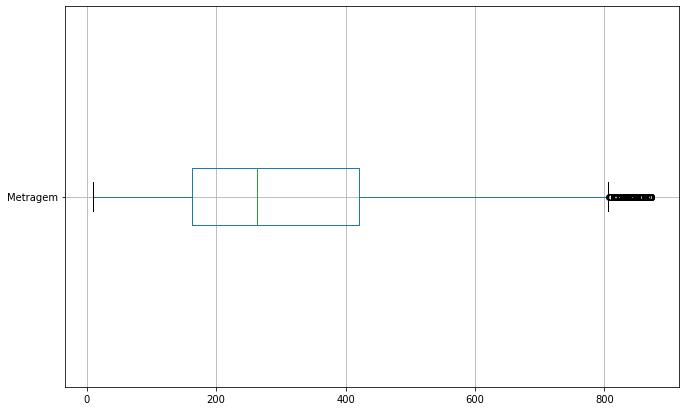

In [7]:
data[['Metragem']].boxplot(vert = 0)

Imóveis com maiores e menores metragens

In [8]:
# ranking de imóveis com menor metragem
data.sort_values('Metragem')[0:10]

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
Index,,,,,,,,,,
8400,8766,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$,800000.0
4268,4513,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,20,3,2,2,R$,800000.0
4312,4557,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$,800000.0
4838,5102,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$,800000.0
7428,7774,Rua Barra da Jangada,Parada Inglesa,São Paulo,29,1,1,1,R$,300000.0
8453,8819,NaN,Vila Bela,São Paulo,36,2,1,1,R$,200000.0
6083,6398,Rua Ipomeias,Vila Bela,São Paulo,36,2,1,1,R$,196000.0
253,261,"Rua Ipomeias, 289",Vila Bela,São Paulo,36,2,1,1,R$,190000.0
1752,1862,Rua Bela Vista,Santo Amaro,São Paulo,37,5,5,2,R$,690000.0


In [9]:
# ranking de imóveis com maior metragem
data.sort_values('Metragem', ascending = False)[0:10]

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
Index,,,,,,,,,,
1029,1089,Rua Suécia,Jardim Europa,São Paulo,872,5,5,8,R$,16900000.0
5543,5836,NaN,Jardim Europa,São Paulo,872,4,5,7,R$,18000000.0
2654,2823,"Rua Suécia, 223",Jardim Europa,São Paulo,872,4,5,7,R$,18000000.0
5805,6108,NaN,Jardim Europa,São Paulo,872,3,4,7,R$,18000000.0
4162,4402,Rua Suécia,Jardim Europa,São Paulo,872,4,7,7,R$,18000000.0
4655,4912,NaN,Jardim Leonor,São Paulo,870,4,6,4,R$,6900000.0
2656,2826,Rua Padre José Griecco,Cidade Jardim,São Paulo,870,4,9,6,R$,6000000.0
2469,2625,Rua Sílvio Portugal,Pacaembu,São Paulo,870,7,1,6,R$,3200000.0
1686,1792,NaN,Jardim América,São Paulo,870,5,8,14,R$,28000000.0


Quartis e quantidade de imóveis

In [10]:
Q1 = metragem.quantile(.25)
Q3 = metragem.quantile(.75)

In [11]:
print(f'Imóveis abaixo de Q1 (25%): {len(metragem[metragem < Q1])} imóveis')
print(f'Imóveis entre Q1 (25%) e Q3 (75%): {len(metragem[(metragem > Q1) & (metragem < Q3)])} imóveis')
print(f'Imóveis acima de Q3 (75%): {len(metragem[metragem > Q3])} imóveis')

Imóveis abaixo de Q1 (25%): 2189 imóveis
Imóveis entre Q1 (25%) e Q3 (75%): 4376 imóveis
Imóveis acima de Q3 (75%): 2132 imóveis


In [12]:
abaixo_Q1 = len(metragem[metragem < Q1])
entre_Q1_Q3 = len(metragem[(metragem > Q1) & (metragem < Q3)])
acima_Q3 = len(metragem[metragem > Q3])

imoveis_quartis = np.array([abaixo_Q1, entre_Q1_Q3, acima_Q3])

Text(0, 0.5, 'Nº de imóveis')

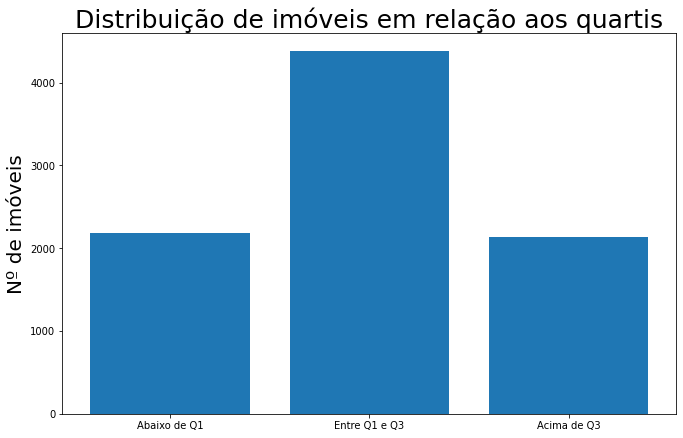

In [13]:
x = ['Abaixo de Q1', 'Entre Q1 e Q3', 'Acima de Q3']

imoveis_quartis_bar = plt.bar(x, imoveis_quartis)
plt.title('Distribuição de imóveis em relação aos quartis')
plt.ylabel('Nº de imóveis')

Distribuição de imóveis por valor de metragem

In [14]:
f'São ao todo {len(data["Metragem"].unique())} valores diferentes de metragem.'

'São ao todo 730 valores diferentes de metragem.'

In [15]:
imoveis_por_metragem = pd.DataFrame(data.value_counts(subset = 'Metragem'))
imoveis_por_metragem.columns = ['Nº de imóveis']

In [16]:
imoveis_por_metragem['Metragem'] = imoveis_por_metragem.index
imoveis_por_metragem = imoveis_por_metragem[['Metragem', 'Nº de imóveis']]
imoveis_por_metragem['Index'] = range(imoveis_por_metragem.shape[0])
imoveis_por_metragem.set_index('Index', inplace = True)
imoveis_por_metragem

,Metragem,Nº de imóveis
Index,,
0,200,207
1,300,188
2,250,150
3,180,148
4,400,147
...,...,...
725,541,1
726,702,1
727,701,1


In [17]:
imoveis_por_metragem['Nº de imóveis'].sum()

8765

In [18]:
imoveis_por_metragem[imoveis_por_metragem['Metragem'] < imoveis_por_metragem['Metragem'].median()]['Nº de imóveis'].sum()

6489

In [19]:
imoveis_por_metragem[imoveis_por_metragem['Metragem'] > imoveis_por_metragem['Metragem'].median()]['Nº de imóveis'].sum()

2276

Text(0, 0.5, 'Nº de imóveis')

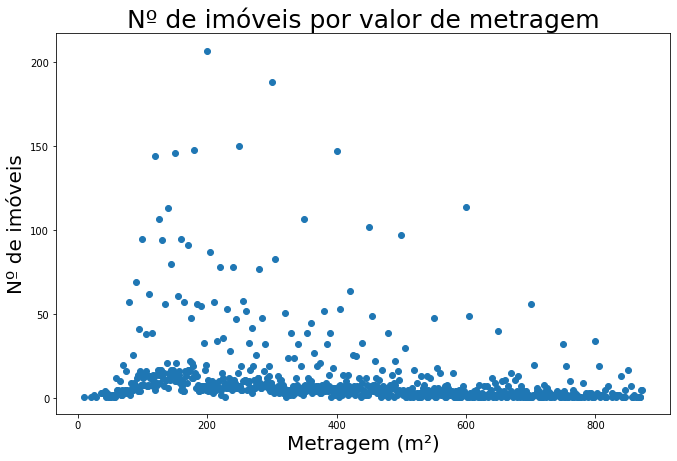

In [20]:
plt.scatter(imoveis_por_metragem['Metragem'], imoveis_por_metragem['Nº de imóveis'])
plt.title('Nº de imóveis por valor de metragem')
plt.xlabel('Metragem (m²)')
plt.ylabel('Nº de imóveis')

Número de imóveis por intervalo de metragem

In [21]:
intervalos_metragem = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
labels = ['1 a 100 m²', '101 a 200 m²', '201 a 300 m²', '301 a 400 m²', '401 a 500 m²', '501 a 600 m²', '601 a 700 m²', '701 a 800 m²', '801 a 900 m²']

In [22]:
metragem_cut = pd.cut(data['Metragem'], intervalos_metragem, labels = labels)
metragem_cut

Index
0       401 a 500 m²
1       101 a 200 m²
2       301 a 400 m²
3         1 a 100 m²
4       401 a 500 m²
            ...     
8760    201 a 300 m²
8761      1 a 100 m²
8762    601 a 700 m²
8763    201 a 300 m²
8764    101 a 200 m²
Name: Metragem, Length: 8765, dtype: category
Categories (9, object): ['1 a 100 m²' < '101 a 200 m²' < '201 a 300 m²' < '301 a 400 m²' < ... <
                         '501 a 600 m²' < '601 a 700 m²' < '701 a 800 m²' < '801 a 900 m²']

In [23]:
metragem_por_intervalos = pd.value_counts(metragem_cut)
metragem_por_intervalos

101 a 200 m²    2670
201 a 300 m²    1892
301 a 400 m²    1289
401 a 500 m²    1029
1 a 100 m²       554
501 a 600 m²     547
601 a 700 m²     399
701 a 800 m²     264
801 a 900 m²     121
Name: Metragem, dtype: int64

In [24]:
# list_intervalos = list()
# list_imoveis = list()

# for intervalo, imoveis in metragem_por_intervalos.items():
#   list_intervalos.append(intervalo)
#   list_imoveis.append(imoveis)

# array_intervalos = np.array(list_intervalos)
# array_imoveis = np.array(list_imoveis)

In [27]:
# array_imoveis_intervalos = np.column_stack([array_intervalos, array_imoveis])
# # alterou-se a ordem das linhas do array para ficar na ordem correta dos intervalos
# array_imoveis_intervalos = array_imoveis_intervalos[[4, 0, 1, 2, 3, 5, 6, 7, 8]]
# imoveis_por_intervalos = pd.DataFrame(array_imoveis_intervalos)
# imoveis_por_intervalos.index.name = 'Index'
# imoveis_por_intervalos.columns = ['Intervalo', 'Nº de imóveis']
# imoveis_por_intervalos


,Intervalo,Nº de imóveis
Index,,
0,1 a 100 m²,554
1,101 a 200 m²,2670
2,201 a 300 m²,1892
3,301 a 400 m²,1289
4,401 a 500 m²,1029
5,501 a 600 m²,547
6,601 a 700 m²,399
7,701 a 800 m²,264
8,801 a 900 m²,121


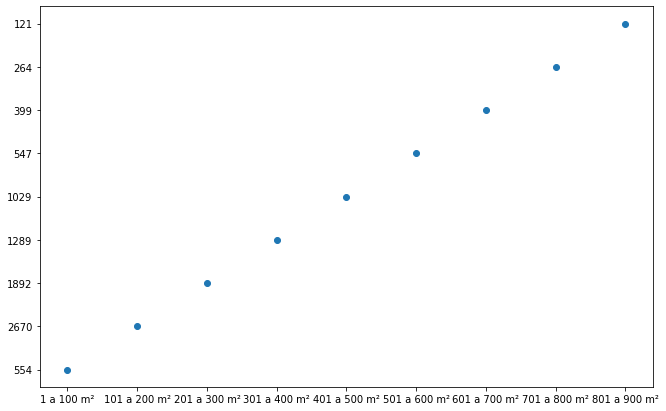

In [29]:
# plt.scatter(imoveis_por_intervalos['Intervalo'], imoveis_por_intervalos['Nº de imóveis'])